# Сборный проект

<b>Исследование для онлайн магазина "Стримчик"</b>

# Описание проекта:
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Цель проекта:
1. При помощи анализа обработать и подготовить данные.
2. Структурирование, коррекция и, если возможны, дополнения в данные.
3. Визуализация необходимых данных для выполнения задачи.
4. Сделать выводы, удовлетворяющие условию задач.
5. Выявить определяющие успешность игры закономерности.
6. Составить портрет пользователя каждого региона (NA, EU, JP).
7. Проверка гипотиз.
8. Выполнение задач согласно чек листу в конце проекта.

In [18]:
#Импортируем необходимые библиотеки и выводим датафрейм для ознакомления с его структурой.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
pd.set_option("display.float_format", "{:.2f}".format)

In [19]:
#Смотрим датафрейм
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<b>Описание данных</b>
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [21]:
#Посмотрим пропуски в процентах
for col in data.columns:
    miss = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(miss*100)))

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
NA_sales - 0%
EU_sales - 0%
JP_sales - 0%
Other_sales - 0%
Critic_Score - 51%
User_Score - 40%
Rating - 40%


In [22]:
# Код ревьюера

data.isna().mean().to_frame().rename(columns={0 : 'доля_пропусков'}).style.format({'доля_пропусков' : '{:.2%}'})

,доля_пропусков
Name,0.01%
Platform,0.00%
Year_of_Release,1.61%
Genre,0.01%
NA_sales,0.00%
EU_sales,0.00%
JP_sales,0.00%
Other_sales,0.00%
Critic_Score,51.32%
User_Score,40.09%


In [23]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


<b>Вывод</b>
- Возможно получится восстановить некоторые данные. 
- Я заметил что данные о critic_score полностью соответствуют оценкам на сайте https://metacritic.com, данные от оценок пользователей могут быть смещены, т.к. регулярно оставляются новые рецензии от пользователей, что не скажешь о игрожуре, которые пишут свои рецензии либо до, либо сразу после выхода игры. Восстановить справедливость удалось благодаря https://web.archive.org, я проверил несколько тайтлов и оценка игроков полностью сошлась.

In [24]:
#Посмотрим пропуски в name
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [25]:
#Посмотрим пропуски в genre
data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [26]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Сделем пометку на будущее что значит каждый вариант рейтинга:
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- «E10+» («Everyone 10 and older») — Для всех от 10 лет и старше
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- "K-A" ("Kids to Adults") — Старая версия рейтинга «E»
- «AO» («Adults Only 18+») — «Только для взрослых»

Информация взята с https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [27]:
#Посмотрим что там еще не получило рейтинг
data.query('Rating == "RP"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.00,0.00,58.00,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.00,Strategy,0.00,0.03,0.00,0.01,63.00,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.00,NaN,RP


Судя по информации с метакритика, используя вебархив за декабрь 2016 Clockwork Empires так и не получила рейтинг до конца года, а дальше в теории мы и не знаем, да и оценки у нее так себе. На остальных так же по прежнему нет информации от ESRB. (Даже на 2022 год)

# Предобработка данных

In [28]:
#Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
#Год выпуска year_of_release преобразуем в int64, откинув нули после запятой, смысла в datetime не вижу
data['year_of_release'] = data['year_of_release'].astype('Int64')
#Заполним пропущенные значения которые мы определили
data['name'] = data['name'].fillna('unknown')
data['genre'] = data['genre'].fillna('unknown')

In [29]:
data['rating'] = data['rating'].fillna('unknown')

In [30]:
# Код ревьюера

df_demo = pd.DataFrame({'col_1' : [1,2,4,np.nan], 'col_2' : [10,20,40,50]}).astype({'col_1' : 'Int64', 'col_2' : 'int'})

try:
    df_demo[['col_1']].corrwith(df_demo['col_2'])
except Exception as e:
    print(repr(e))
    
df_demo = df_demo.astype({'col_1' : 'float'})

df_demo[['col_1']].corrwith(df_demo['col_2'])

AttributeError("'float' object has no attribute 'shape'")


col_1   1.00
dtype: float64

<b>Пропуски данных:</b>
- year_of_release можно было бы заполнить при помощи информации от тех же игр, но на других платформах, но они могут отличаться.
- critic_score не стоит заполнять другими значениями, может испортить общую картину
- user_score аналогично с critic_score
- rating аналогично с critic_score

<b>Причины в пропусках:</b>
- отсутствие информации об игре на аггрегаторе оценок metacritic.
- частные случаи отсутствия user_score: игра еще не была оценена пользователями.

In [31]:
# Код ревьюера

data.melt(id_vars=['user_score','critic_score','rating'], value_vars=['na_sales','eu_sales','jp_sales'])[lambda x : x['value'] > 0].groupby('variable').agg({'user_score' : lambda x : x.isna().mean(), 'critic_score' : lambda x : x.isna().mean(), 'rating' : lambda x : (x=='unknown').mean()})

,user_score,critic_score,rating
variable,,,
eu_sales,0.27,0.37,0.28
jp_sales,0.65,0.66,0.64
na_sales,0.25,0.39,0.25


,critic_score,user_score
,<lambda>,<lambda>
year_of_release,,
1980,1.00,1.00
1981,1.00,1.00
1982,1.00,1.00
1983,1.00,1.00
1984,1.00,1.00
1985,0.93,0.93
1986,1.00,1.00
1987,1.00,1.00


<AxesSubplot:xlabel='year_of_release'>

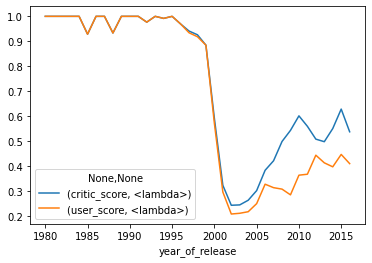

In [32]:
score_none_by_year = data.groupby('year_of_release')[['critic_score', 'user_score']].agg({lambda x: x.isnull().mean()})
display(score_none_by_year)
score_none_by_year.plot()

,critic_score,user_score
,<lambda>,<lambda>
platform,,
2600,1.00,1.00
3DO,1.00,1.00
3DS,0.68,0.56
DC,0.73,0.73
DS,0.67,0.41
GB,1.00,1.00
GBA,0.47,0.37
GC,0.19,0.16


<AxesSubplot:xlabel='platform'>

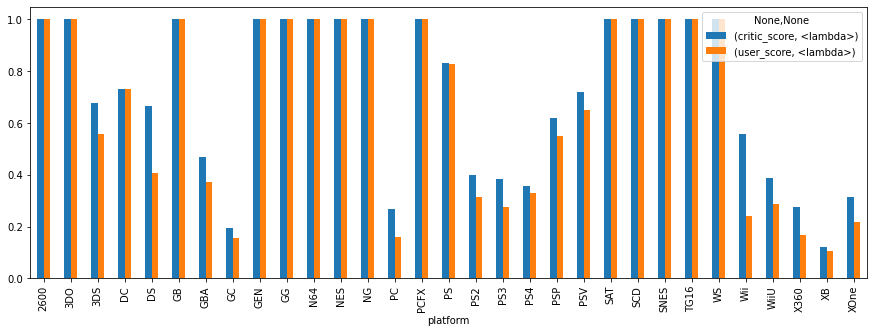

In [33]:
score_none_by_platform = data.groupby('platform')[['critic_score', 'user_score']].agg({lambda x: x.isnull().mean()})
display(score_none_by_platform)
score_none_by_platform.plot(kind = 'bar', figsize=(15, 5))

In [34]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [35]:
#TBD = To Be Determined. Значение не определено, заменим на nan и поменяем тип данных на float
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [36]:
#Посмотрим на явные дубликаты
data.duplicated().sum()

0

In [37]:
#Посчитаем суммарные продажи по всем регионам, данные запишем в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [38]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


# Исследовательский анализ данных

<b>Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</b>

In [39]:
#Период охвата статистики (лет)
display(data['year_of_release'].max())
display(data['year_of_release'].min())
years_of_stat = data['year_of_release'].max() - data['year_of_release'].min()

2016

1980

Text(0, 0.5, 'Частота появления')

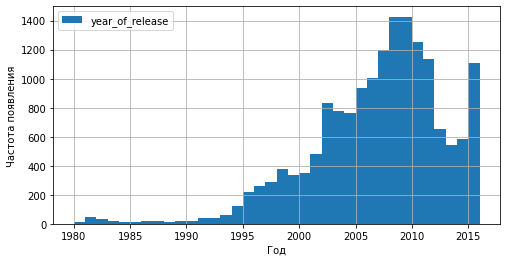

In [40]:
ax = data.plot(y='year_of_release', bins = years_of_stat, kind = 'hist', grid=True, figsize = (8,4))
ax.set_xlabel('Год')
ax.set_ylabel('Частота появления')

На графике отражена статистика от 1980 по 2016 год включительно. 

В начале 1980х пионеры геймдевелопмента были заинтересованы в новой, весьма амбициозной развлекательной нише, виден небольшой подъем в количестве производства игр, который далее пошел на спад из-за известного кризиса пиратства. Кризис индустрии компьютерных игр 1983 года — мировой кризис, повлекший в течение 1983—1984 годов спад рынка игровых консолей, компьютерных игр к ним и банкротство ведущих компаний-разработчиков игровых приставок и домашних компьютеров и ознаменовавший окончание второго поколения игровых консолей. Если бы не Nintendo с их лицензированием и защитой от пиратства, то статистика бы упала в ноль. Со временем после затяжного хвоста, график стремительно ползет вверх, это связано с выходом и популяризации сначала продуктов Nintendo и Sega, а затем резкий подъем, в связи с выходом на рынок Sony Playstation 1. Выход каждого нового поколения показывает скачок вверх на графике. Спад после 2010 года можно объяснить тем, что запросы игроков в качестве новых проектов было сложнее удовлетворить, разработка новых проектов стала занимать куда больше времени, стало появляться меньше A/B тайтлов, силы разработчиков уходили на разработку AAA продукции. Также можно аргументировать появлением мобильного гейминга на телефонах, это является совсем другой нишей. Рост 2015 можно объяснить выходом новых игр для современных платформ и портом старых игр на современные консоли.

<AxesSubplot:xlabel='year_of_release'>

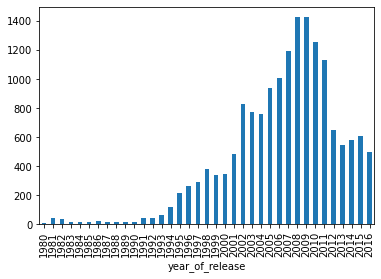

In [41]:
data.groupby('year_of_release')['name'].count().plot(kind = 'bar')

<b>Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?</b>

In [42]:
stat = data['platform'].value_counts().head(10)

In [43]:
print('hello')

hello


Text(0, 0.5, 'Количество игр')

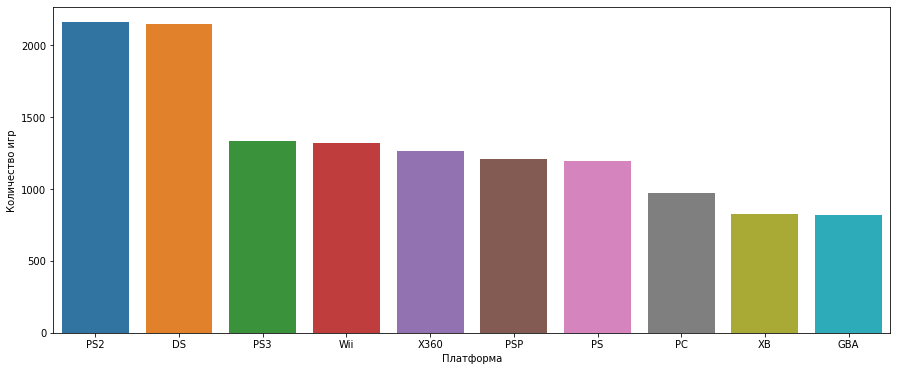

In [44]:
#график количества игр на платформу
plt.figure(figsize=(15,6))
sns.barplot(x = stat.index,y=stat.values)
plt.xlabel("Платформа")
plt.ylabel("Количество игр")

In [45]:
stat = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
stat.head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Text(0, 0.5, 'Продажи')

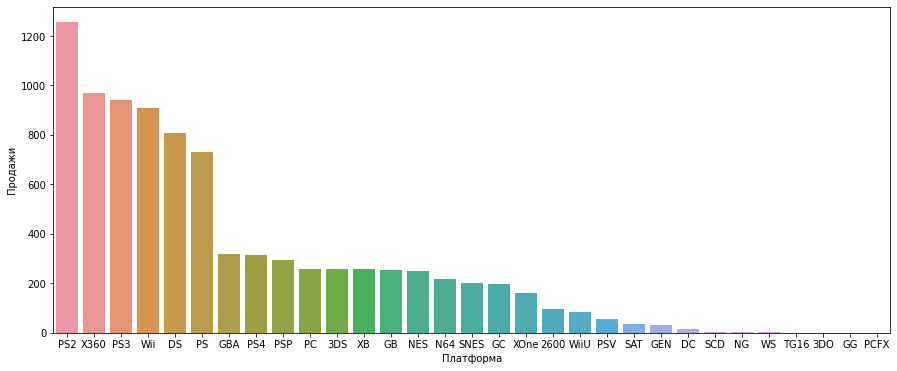

In [46]:
#график продаж игр на платформу
plt.figure(figsize=(15,6))
sns.barplot(x = stat.index,y=stat['total_sales'])
plt.xlabel("Платформа")
plt.ylabel("Продажи")

<b>Самые популярные платформы по вышедшим играм:</b>
- Playstation 2
- Nintendo DS  
- Playstation 3
- Nintendo Wii 
- Xbox 360
- PSP 

<b>Самые популярные платформы по продажам игр:</b>
- Playstation 2
- Xbox 360
- Playstation 3
- Nintendo Wii
- Nintendo DS
- Playstation 1

Исходя из графика за топ продаж будем считать 6 лидирующих платформ, далее идет резкий спад.

In [47]:
#Пусть этот список будет ТОП-6 платформ по продажам
top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [48]:
#Функция для разреза и сбора данных по платформе
def slice_platform_total_sales(platform, data):
    slicee = data[(data['platform'] == platform)]
    total = slicee.pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

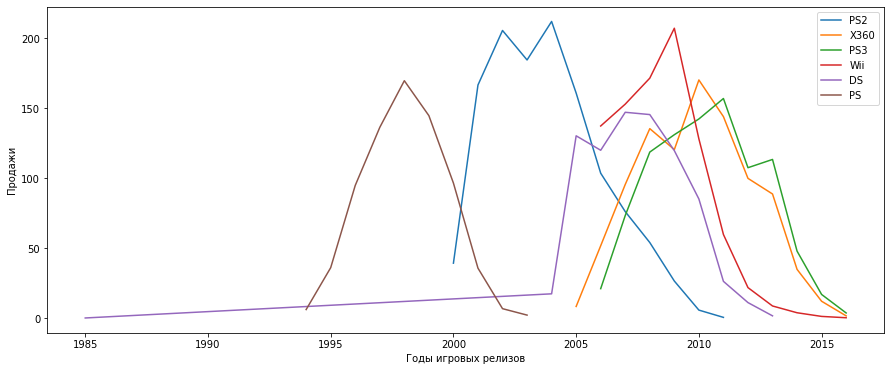

In [49]:
#График продаж по платформам
plt.figure(figsize=(15,6))
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for platform in top:
    sns.lineplot(data=slice_platform_total_sales(platform,data)['total_sales'], label=platform)
    plt.legend()

<AxesSubplot:xlabel='year_of_release'>

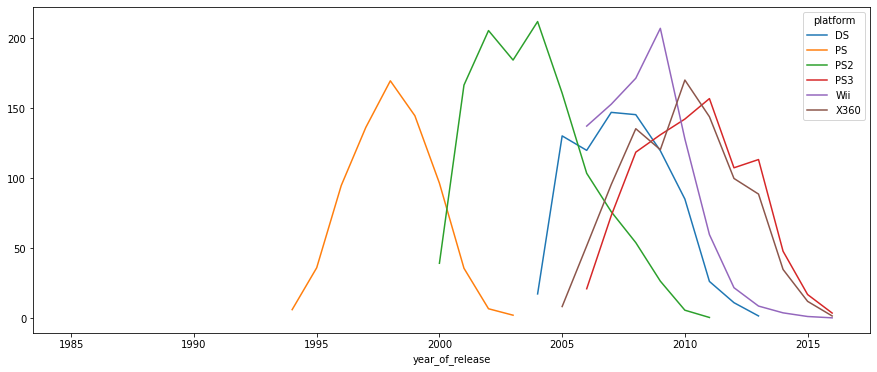

In [50]:
# Код ревьюера

data[data['platform'].isin(top)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,6))

In [51]:
#Интересный артифакт, платформа Nintendo DS была выпущена в 2004 году
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02


<b>Исходя из данных по графику можно сделать вывод:</b>

- В среднем срок жизни одной платформы можно определить в 10 лет.
- Пик продаж приходится на середину жизненого цикла платформы.
- У некоторых платформ есть просадки, возможно из-за каких то технических проблем (как было со стартовой версией Xbox360 на которую стали поступать жалобы о поломках), либо активностью пиратов.
- Новые платформы от одного производителя (на графике Sony с их PS, PS2, PS3) появляются на 75% жизненого цикла старого.

<b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.</b>

In [52]:
#Посмотрим в каком году появилась первая игра на платформу, тем самым определив релиз платформы
data.groupby('platform')['year_of_release'].min().sort_values(ascending=False).head(5)

platform
XOne    2013
PS4     2013
WiiU    2012
3DS     2011
PSV     2011
Name: year_of_release, dtype: Int64

In [53]:
#Выборка из актуальных платформ и их предшественников
current_platform = ['PS3', 'X360', 'XOne', 'PS4', 'WiiU', '3DS', 'PSV', 'PC']

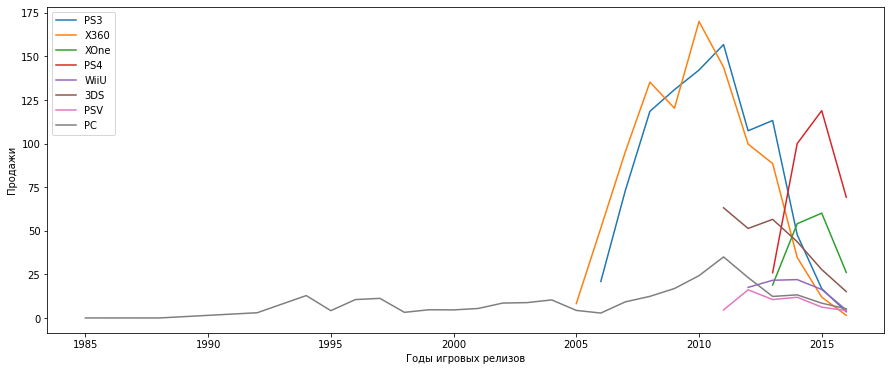

In [54]:
#График релизов / продаж 
plt.figure(figsize=(15,6))
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for platform in current_platform:
    sns.lineplot(data=slice_platform_total_sales(platform,data)['total_sales'], label=platform)
    plt.legend()

За текущий период возьмем отрезок от 2013 по 2016

In [55]:
#Создадим новый датафрейм, отфильтровав только актуальные релизы
current_data = data.query('year_of_release >= 2013')

In [56]:
current_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62


<b>Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.</b>

- Зная что информация за 2016 представлена не полной, а средний срок жизни консоли в 10 лет и пик на половине - можно с увереностью сказать что самые потенциально прибыльные платформы это Playstation 4 (PS4) и Xbox One (XOne). Они же - лидеры рынка.

- Nintendo WiiU на старте продаж была интересной для пользователей и на графике виден провал платформы со временем, можно считать ее провальной.

- Nintendo 3DS так же на старте была очень востребована, но со временем продажи очень сильно упали, т.к. она была скорее обновленной версией DS со своими гимиками.

- Playstation Vita (PSV) с самого старта была не востребована из-за малого количества релизов игр.

- На счет PC все было стабильно, но с анонсом и релизом приставок нового поколения всем стали интереснее PS4 и XOne.

<b>Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.</b>

(0.0, 2.0)

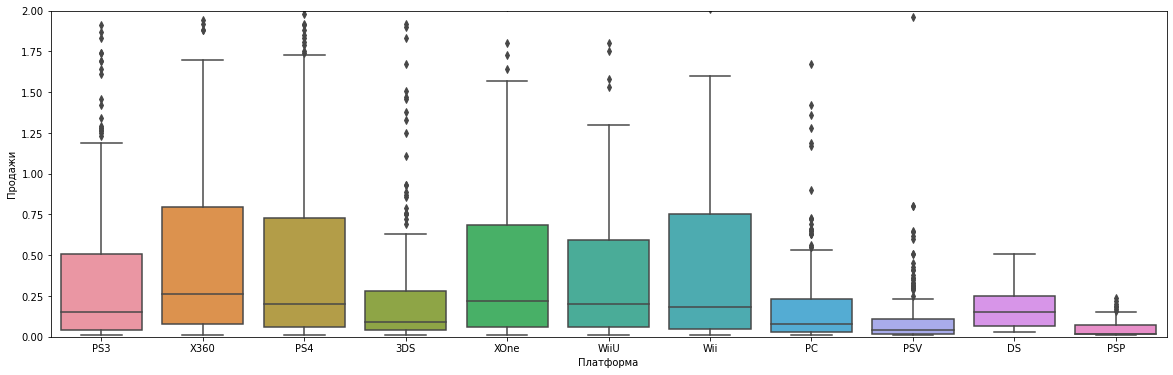

In [57]:
#Построим графики "ящик с усами" для актуальных платформ
plt.figure(figsize=(20,6))
sns.boxplot(data=current_data, x='platform', y='total_sales')
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Продажи',fontsize=10)
plt.ylim([0,2])

На графиках видно что из новых платформ лидеры PS4 и XOne, которые уже перегнали PS3 и догоняют X360.

<b>Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.</b>

За популярную платформу возьмем Playstation 2

In [58]:
ps2_data = data.query('platform == "PS2"')

In [59]:
ps2_data[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.40,0.17
critic_score,0.40,1.00,0.56
user_score,0.17,0.56,1.00


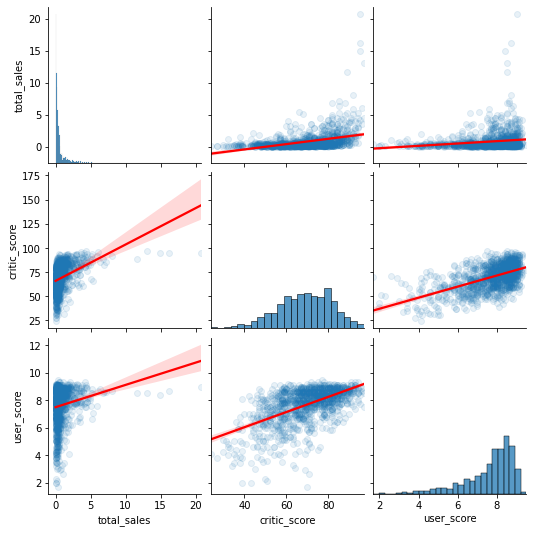

In [60]:
sns.pairplot(ps2_data, vars=['total_sales', 'critic_score', 'user_score'], kind="reg", plot_kws={
    'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Есть средняя зависимость продаж от оценок критиков, многие пользователи прежде чем купить какой то новый проект посмотрят оценки от игрожура и далее уже сделают выбор купить, или нет.

А вот оценки пользователей не так влияют на продажи. Пользователи склонны больше доверять профессиональным игровым аналитикам и ревьюверам.

<b>Соотнесите выводы с продажами игр на других платформах.</b>

In [61]:
#Для удобства создадим функцию, которая будет чертить графики
def do_corr_statistics(platform, data):
    current_platform_data = data[data['platform'] == platform]
    pplot = sns.pairplot(current_platform_data, vars=['total_sales', 'critic_score', 'user_score'], kind="reg", plot_kws={
        'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    pplot.fig.suptitle(platform)
    return pplot
#И функцию для корреляции в цифровом виде
def do_corr(platform, data):
    current_platform_data = data[data['platform'] == platform]
    cor = current_platform_data[['total_sales', 'critic_score', 'user_score']].corr()
    return cor

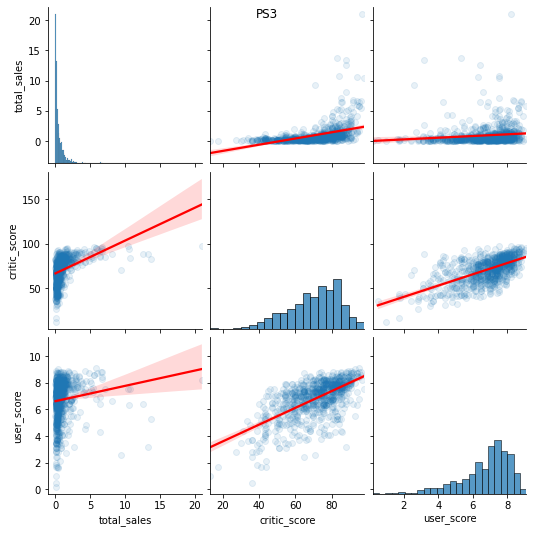

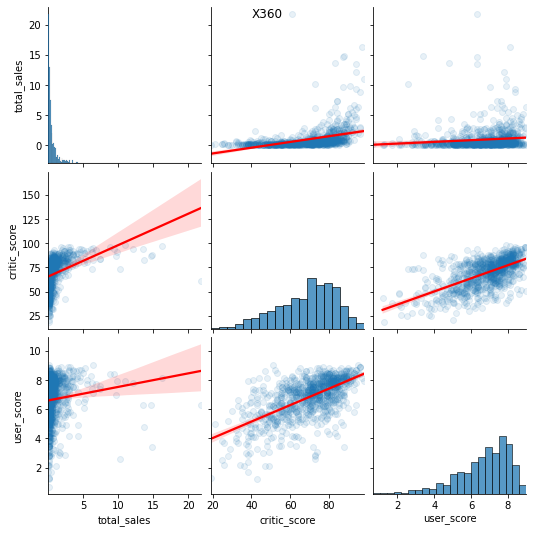

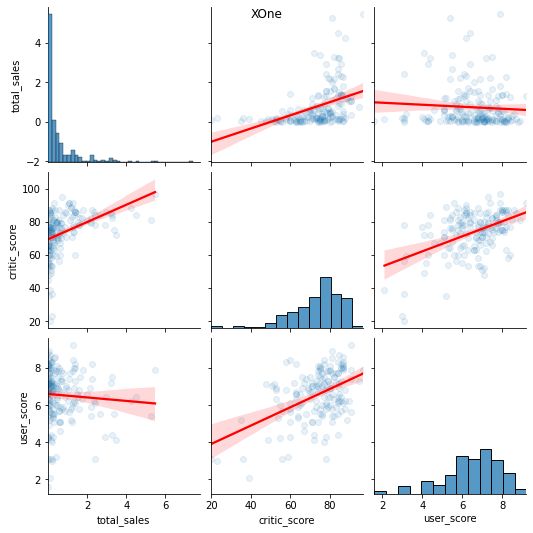

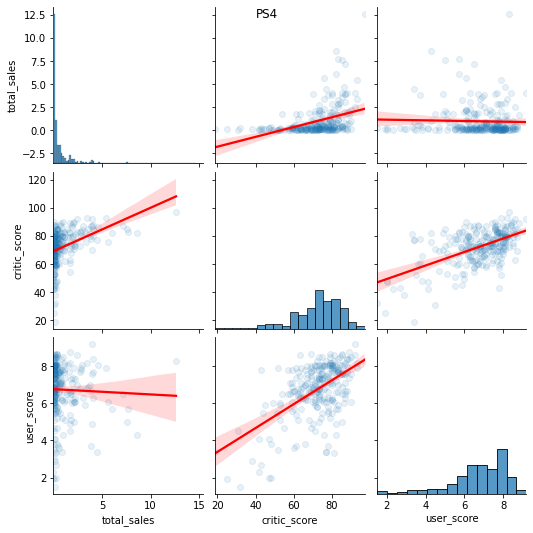

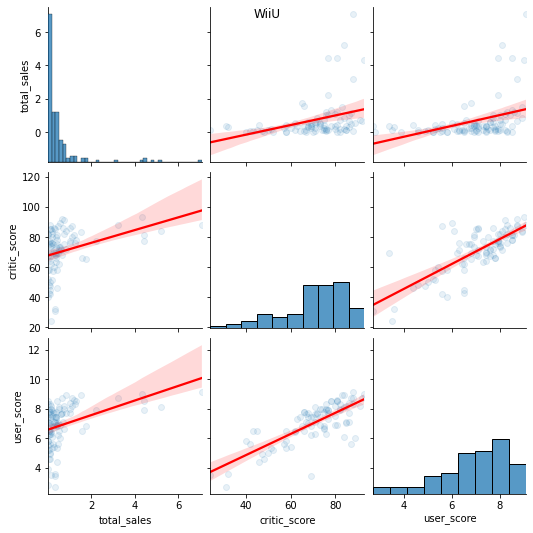

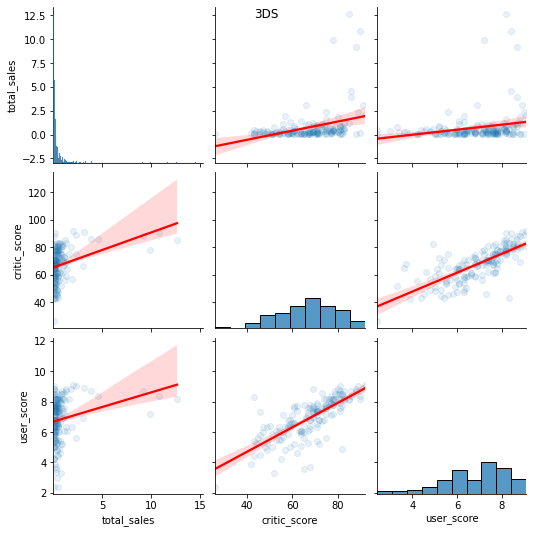

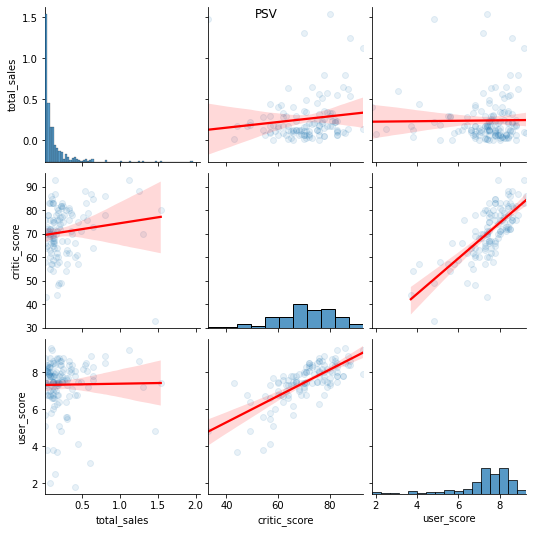

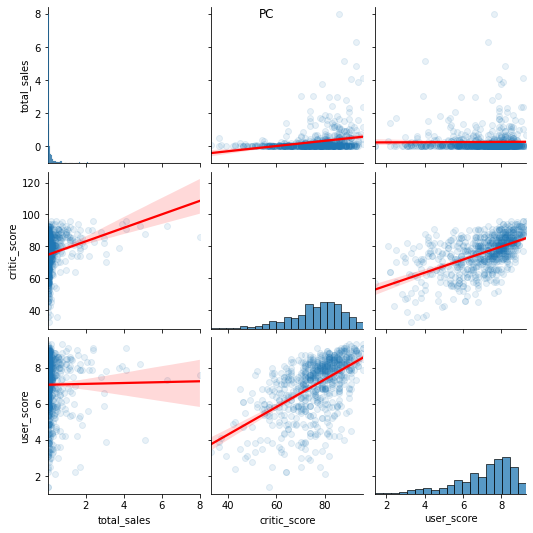

In [62]:
#Циклом for переберем актуальные платформы
for platform in current_platform:
    do_corr_statistics(platform, data)

In [63]:
#Так же циклом переберем их числовые показатели корреляции
for platform in current_platform:
    print(platform)
    print(do_corr(platform, data))
    print()

PS3
              total_sales  critic_score  user_score
total_sales          1.00          0.43        0.13
critic_score         0.43          1.00        0.63
user_score           0.13          0.63        1.00

X360
              total_sales  critic_score  user_score
total_sales          1.00          0.39        0.11
critic_score         0.39          1.00        0.62
user_score           0.11          0.62        1.00

XOne
              total_sales  critic_score  user_score
total_sales          1.00          0.42       -0.07
critic_score         0.42          1.00        0.47
user_score          -0.07          0.47        1.00

PS4
              total_sales  critic_score  user_score
total_sales          1.00          0.41       -0.03
critic_score         0.41          1.00        0.56
user_score          -0.03          0.56        1.00

WiiU
              total_sales  critic_score  user_score
total_sales          1.00          0.35        0.40
critic_score         0.35          1.

In [64]:
for platform in current_platform:
    display(platform)
    display(do_corr(platform, data))

'PS3'

,total_sales,critic_score,user_score
total_sales,1.00,0.43,0.13
critic_score,0.43,1.00,0.63
user_score,0.13,0.63,1.00


'X360'

,total_sales,critic_score,user_score
total_sales,1.00,0.39,0.11
critic_score,0.39,1.00,0.62
user_score,0.11,0.62,1.00


'XOne'

,total_sales,critic_score,user_score
total_sales,1.00,0.42,-0.07
critic_score,0.42,1.00,0.47
user_score,-0.07,0.47,1.00


'PS4'

,total_sales,critic_score,user_score
total_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


'WiiU'

,total_sales,critic_score,user_score
total_sales,1.00,0.35,0.40
critic_score,0.35,1.00,0.77
user_score,0.40,0.77,1.00


'3DS'

,total_sales,critic_score,user_score
total_sales,1.00,0.35,0.22
critic_score,0.35,1.00,0.74
user_score,0.22,0.74,1.00


'PSV'

,total_sales,critic_score,user_score
total_sales,1.00,0.13,0.01
critic_score,0.13,1.00,0.73
user_score,0.01,0.73,1.00


'PC'

,total_sales,critic_score,user_score
total_sales,1.00,0.26,0.01
critic_score,0.26,1.00,0.56
user_score,0.01,0.56,1.00


In [65]:
# Код ревьюера

current_data.groupby('platform')[['critic_score','user_score']].corrwith(current_data['total_sales'])

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,critic_score,user_score
platform,,
3DS,0.36,0.24
DS,NaN,NaN
PC,0.20,-0.09
PS3,0.33,0.00
PS4,0.41,-0.03
PSP,NaN,-1.00
PSV,0.25,0.00
Wii,NaN,0.68
WiiU,0.38,0.42


Делаем вывод что на других платформах ситуация примерно похожая, есть средняя зависимость продаж от оценок критиков, оценки пользователей не так хорошо стимулируют продажи.

За исключением Nintendo. Их аудитория так же склонна доверять мнению других пользователей, как и критикам.

<b>Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</b>

In [66]:
#Сгруппируем актуальный датасет по жанрам, на каждый жанр расчитаем его суммарные продажи
genres_stats = current_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
genres_stats

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Text(0, 0.5, 'Продажи')

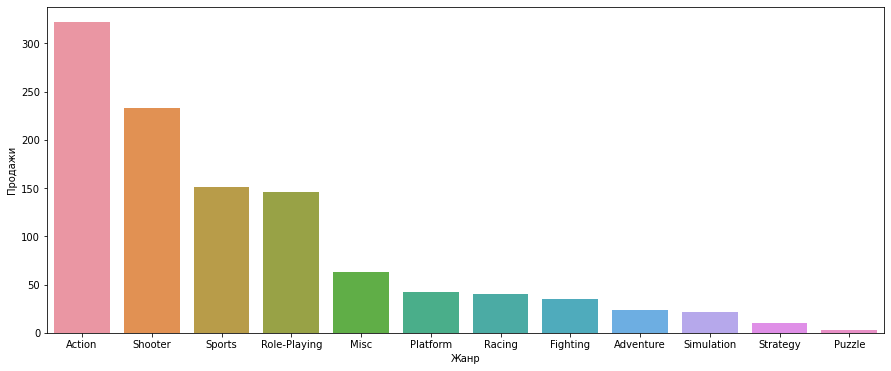

In [67]:
#Нарисуем barplot
plt.figure(figsize=(15,6))
sns.barplot(x = genres_stats.index,y=genres_stats['total_sales'])
plt.xlabel("Жанр")
plt.ylabel("Продажи")

Самый продаваемый жанр видеоигр - Action, не удивительно, современному пользователю нужно зрелищ.
На втором месте жанр Shooter, что впринципе очень похоже на Action, высокая динамика.
На третьем месте жанр Sports, симуляторы спорта.

Закрывают чарт Simulation, Strategy и Puzzle.

Скорее всего пользователям не нравится думать и вникать, но нравятся зрелищные, либо спортивные игры.

In [68]:
genres_stats_median = current_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

In [69]:
genres_stats_median

genre
Shooter        0.45
Sports         0.24
Platform       0.22
Role-Playing   0.12
Fighting       0.12
Racing         0.12
Action         0.11
Simulation     0.10
Misc           0.10
Strategy       0.08
Puzzle         0.06
Adventure      0.03
Name: total_sales, dtype: float64

Text(0, 0.5, 'Продажи median')

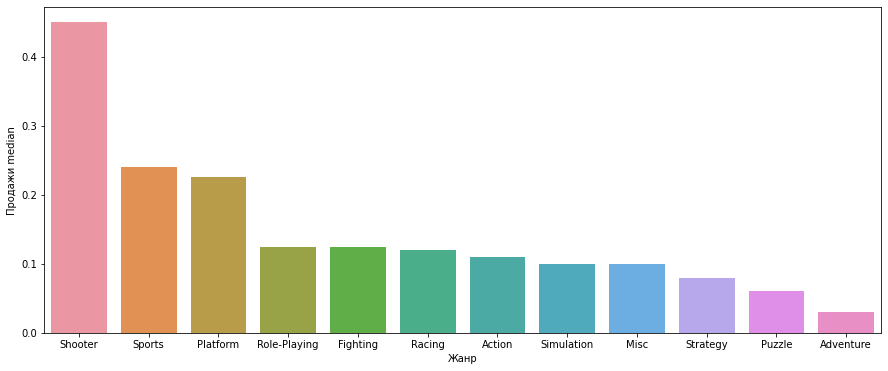

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x=genres_stats_median.index, y=genres_stats_median.values)
plt.xlabel("Жанр")
plt.ylabel("Продажи median")

# Составьте портрет пользователя каждого региона

<b> Определите для пользователя каждого региона (NA, EU, JP): </b>

In [71]:
#Список регионов
regions = ['na_sales', 'eu_sales', 'jp_sales']

In [72]:
#Создадим две функции:
#Первая будет рисовать графики и таблицы для исторического понимания пользователей
def do_region_sales_stats(region, obj):
    for region in regions:
        summ = data[region].sum()
        grouped = data.groupby(by=obj).agg({region:'sum'}).sort_values(by=region, ascending=False).head(5) 
        display(grouped)
        plt.figure(figsize=(8,3))
        display(sns.barplot(x = grouped.index,y=grouped[region]))
        plt.xlabel(obj)
        plt.ylabel("Продажи")
        plt.suptitle(region, fontsize=15)

#Вторая будет рисовать графики и таблицы для понимания современного пользователя с актуальными платформами        
def do_region_sales_stats_current(region, obj):
    temp = data[data['year_of_release']>2014]
    for region in regions:
        summ = temp[region].sum()
        grouped = temp.groupby(by=obj).agg({region:'sum'}).sort_values(by=region, ascending=False).head(5) 
        display(grouped)
        plt.figure(figsize=(8,3))
        display(sns.barplot(x = grouped.index,y=grouped[region]))
        plt.xlabel(obj)
        plt.ylabel("Продажи")
        plt.suptitle(region, fontsize=15)

## Самые популярные платформы (топ-5). Опишите различия в долях продаж.

<b>Историческая статистика за все время:</b>

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


<AxesSubplot:xlabel='platform', ylabel='na_sales'>

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


<AxesSubplot:xlabel='platform', ylabel='jp_sales'>

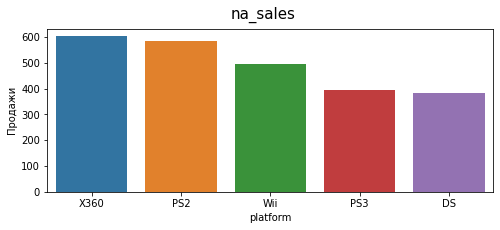

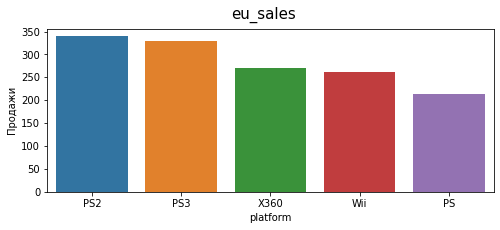

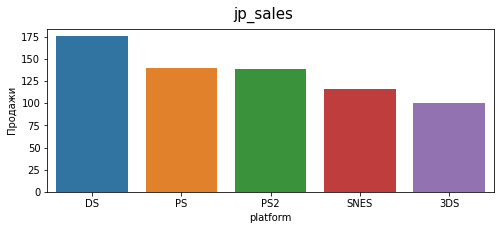

In [73]:
do_region_sales_stats(regions, 'platform')

<b>Пользователь региона NA (North America)</b>
- предпочитает консоль Xbox 360, и оно понятно, X360 очень сильно рекламировался и продвигался именно на территории Штатов, да и разработка Microsoft.
- PS2 всемирно любимая консоль, она на втором месте. 
- У Nintendo Wii тоже была хорошая рекламная компания, необычность и казуальность платформы помогли ей занять 3 место на рынке США. 
- PS3 хорошо рекламировалась, но в США войну консолей выйграл X360.
- Nintendo DS очень распрастраненная карманная игровая приставка, занявшая 5 место на рынке США по продажам игр.

<b>На рынке EU (Europe)</b> 
- лидирует PS2 и PS3, X360 для европейцев оказался не таким родным, как для американцев. 
- Nintendo Wii занимает 4 место, и закрывает список PS.

<b>На рынке JP (Japan) ситуация интересная.</b>
- Основаная масса продаж приходится на портативную Nintendo DS, японцы очень любят играть вне дома.
- PS one занимает второе место, PS2 третье
- SNES занимает четвертое место
- Замыкает топ-5 Nintendo 3ds, японцы очень любят играть вне дома.

<b>Статистика за последнее время:</b>

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


<AxesSubplot:xlabel='platform', ylabel='na_sales'>

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


<AxesSubplot:xlabel='platform', ylabel='jp_sales'>

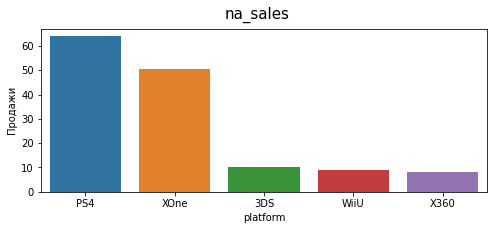

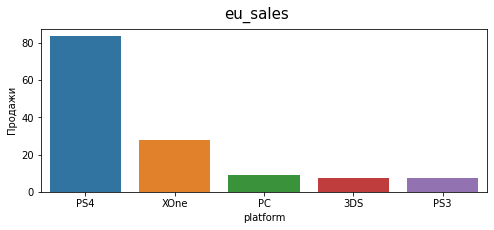

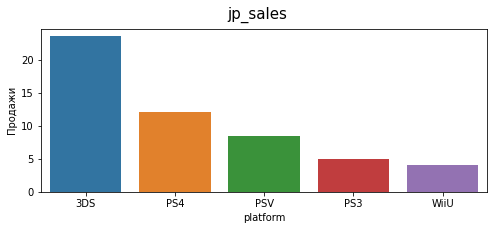

In [74]:
do_region_sales_stats_current(regions, 'platform')

<b>Статистика за последнее время поможет нам определить правильный вектор развития на 2017 год.

Исходя из данных графиков:</b>

- В Америке и Европе стали преобладать приставки PS4, я думаю это связано с провалом на старте продаж Xone и отсутствие эксклюзивной линейки игр у Xone.
- В Японии все так же популярны карманные приставки, 3DS и PSvita, а так же приставки их разработки.

## Самые популярные жанры (топ-5). Поясните разницу.

<b>Историческая статистика за все время:</b>

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


<AxesSubplot:xlabel='genre', ylabel='na_sales'>

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


<AxesSubplot:xlabel='genre', ylabel='eu_sales'>

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

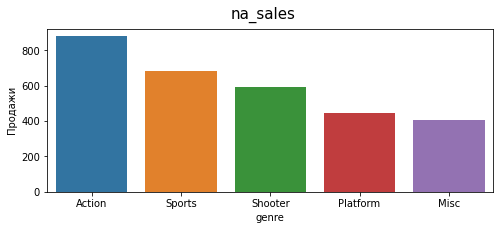

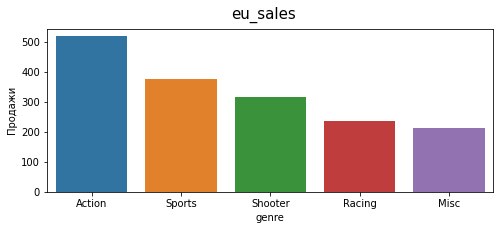

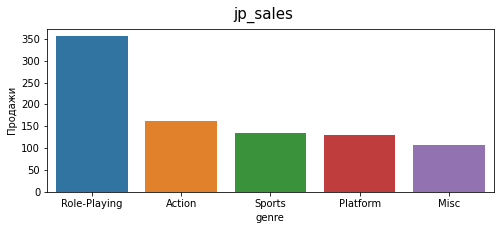

In [75]:
do_region_sales_stats(regions, 'genre')

В США предпочтение отдают жанрам Action, Sports, Shooter, Platform, Misc. Пользователям нравятся зрелищные адреналиновые игры.

У европейцев жанровый вкус похож на американский, с разницей что они любят жанр Racing вместо Platform.

Японские пользователи с большим отрывом предпочитают Role-playing, что подтверждает тот факт что в стране восходящего солнца у жанра RPG свое ответвление J-RPG с уникальными игровыми элементами свойственными этому жанру.

<b>Статистика за последнее время:</b>

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


<AxesSubplot:xlabel='genre', ylabel='na_sales'>

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


<AxesSubplot:xlabel='genre', ylabel='eu_sales'>

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

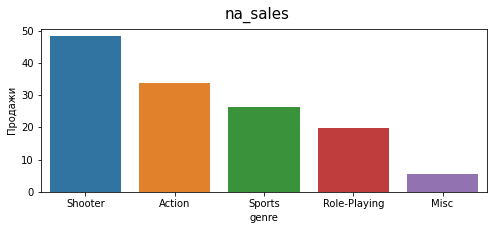

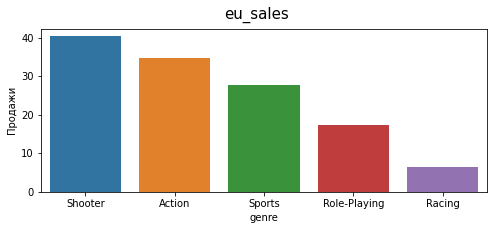

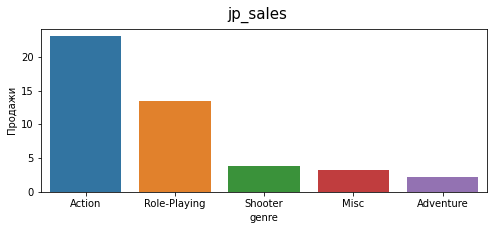

In [76]:
do_region_sales_stats_current(regions, 'genre')

<b>Статистика за последнее время поможет нам определить правильный вектор развития на 2017 год.

Исходя из данных графиков:</b>

- На западе жанр Shooter стал самым востребованым и популярным, отодвинув Action на второе место
- Востребованность жанрами в Америке и Европе стал очень похож
- В Японии жанр Action стал популярнее RPG, возможно жанровый прессинг и желание быть похожими повлиял на выбор пользователей

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<b>Историческая статистика за все время:</b>

,na_sales
rating,
E,1292.99
unknown,1242.46
T,759.75
M,748.48
E10+,353.32


<AxesSubplot:xlabel='rating', ylabel='na_sales'>

,eu_sales
rating,
E,710.25
unknown,613.83
M,483.97
T,427.03
E10+,188.52


<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

,jp_sales
rating,
unknown,841.96
E,198.11
T,151.40
M,64.24
E10+,40.20


<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

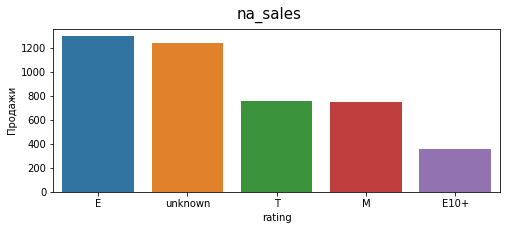

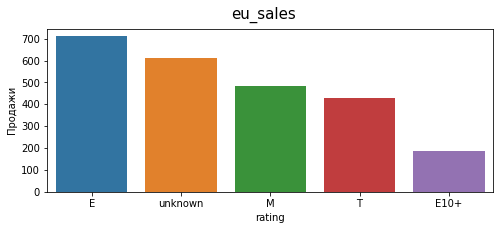

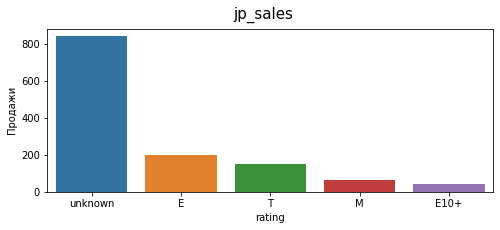

In [77]:
do_region_sales_stats(regions, 'rating')

Жители Америки предпочитают брать игры с рейтингом E (everyone), рейтинги T (teen) и M (mature) пользуются спросом в два раза меньше, и еще в два раза меньше рейтинг E10+ соответственно.

Похожая картина что и у США, с разницей что игры для взрослой аудитории M (mature) занимают второе место, а T (teen) третье.

В Японии предпочтение отдают играм с рейтингом E (everyone) и чуть менее охотно с рейтингом T (teen), далее идут с большим отставанием игры с рейтингом M (mature) и E10+.

,na_sales
rating,
M,47.03
unknown,37.44
E,26.59
T,22.86
E10+,17.87


<AxesSubplot:xlabel='rating', ylabel='na_sales'>

,eu_sales
rating,
M,45.54
unknown,35.71
E,34.83
T,20.32
E10+,11.54


<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

,jp_sales
rating,
unknown,32.89
T,7.70
E,5.25
M,4.29
E10+,3.27


<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

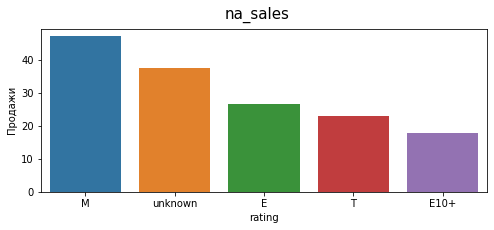

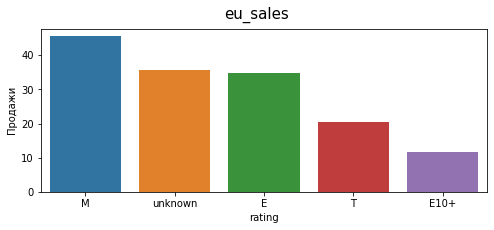

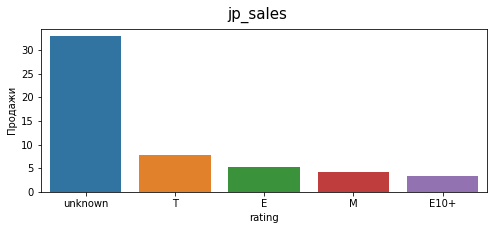

In [78]:
do_region_sales_stats_current(regions, 'rating')

<b>Статистика за последнее время поможет нам определить правильный вектор развития на 2017 год.

Исходя из данных графиков:</b>

- Наиболее популярными стали проекты с рейтингом M (mature), возможно сказывается что со временем люди, ставящие возрастную оценку игре стали более скурпулезны и избирательны в плане оценивания, что в 90х могло получить оценку T, сейчас может получить M.
- Рейтинг E (everyone) на западе ушел на второй план.
- В Японии наиболее популярны игры с рейтингом T. Скорее всего связано с их пристрастием к карманным приставкам, в основном игры на них расчитаны на более широкий охват пользователей.

<div class="alert alert-info"> <b>Комментарий студента:</b> Обновленный вывод:

Портрет пользователя региона NA:
- Предпочитает экшн игры или платформеры с высокой динамикой.
- Играет на Xbox360, PS2, Wii или PS3
- Рейтинг E преобладает, значит в основном это дети.

Портрет пользователя региона EU:
- Предпочитает экшн игры и гонки.
- Предпочитает приставки от Sony.
- Рейтинг E преобладает, значит в основном это дети.

Портрет пользователя региона JP:
- Предпочитает жанр RPG.
- Предпочитает портативные игровые приставки.
- Преобладающее число проектов без рейтинга.

<b>Современный портрет пользователя</b>

Портрет пользователя региона NA:
- Предпочитает Shooter и Action, игры с высокой динамикой.
- Играет на PS4 и XOne.
- Рейтинг M (mature) самый популярный.

Портрет пользователя региона EU:
- Предпочитает Shooter и Action, игры с высокой динамикой.
- Играет на PS4 и XOne.
- Рейтинг M (mature) самый популярный.

Портрет пользователя региона JP:
- Предпочитает Action и RPG
- Играет в карманные приставки и PS4
- Преобладающее число проектов без рейтинга.
</div>

# Проверьте гипотезы

<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b>

Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [79]:
#создадим переменные с информацией о user_score для xbox one и pc, с момента выхода xbox one
xbox = data[(data['platform']=='XOne') & (data['year_of_release']>2012)]['user_score']
pc = data[(data['platform']=='PC') & (data['year_of_release']>2012)]['user_score']

In [80]:
xbox = current_data[current_data['platform']=='XOne']['user_score']
pc = current_data[current_data['platform']=='PC']['user_score']

In [81]:
display(xbox.mean())
display(pc.mean())

6.521428571428572

6.269677419354839

In [82]:
alpha = .05

results = st.ttest_ind(xbox.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: нулевую гипотезу отвергнуть не получилось. Вероятность получить значения равное наблюдаемому или разницу более нетепичную ~15%, при условии что H₀ верна.

<b>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</b>

Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жарнов Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [83]:
action = data[(data['genre']=='Action') & (data['year_of_release']>2012)]['user_score']
sports = data[(data['genre']=='Sports') & (data['year_of_release']>2012)]['user_score']

In [84]:
display(action.mean())
display(sports.mean())

6.837532133676093

5.238124999999999

In [85]:
alpha = .05

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: нулевую гипотезу отвергнуть получилось. Мы почти не имеем вероятность получить средние пользовательские рейтинги жарнов Action и Sports одинаковыми.

<b>Как вы сформулировали нулевую и альтернативную гипотезы:</b>

Исходя из нулевой гипотезы H₀, которая была задана в условиях задачи была сформирована альтернативная гипотеза H₁, которая принималась бы верной если отбросить H₀, т.е. противоречащая нулевой гипотизе, либо vice versa.

<b>Какой критерий применили для проверки гипотез и почему.</b>

st.ttest (t-критерий Стьюдента), для проверки статистических гипотез о равенстве математических ожиданий двух выборок.

# Общий вывод

- Получив датафрейм, привели его в необходимы для анализа вид и порядок, привели к правильному типу данных столбцы, установили нижний регистр для наименований столбцов.


- Заполнили некоторые пропуски данных, где это предоставлялась возможнсть сделать, не потеряв целостность картины для анализа.


- Сделали общий анализ роста рынка игровой индустрии, объяснили причины развития, стагнации и спада продаж.


- Определили самые выгодные для инвистиции платформы, определили средний жизненый цикл платформ (10 лет), определили удачные и неудачные платформы, как исторически за все время, так и в текущее время. Линейка самых продаваемых платформ оказалась: Playstation 2, Xbox 360, Playstation 3, Nintendo Wii, Nintendo DS, Playstation one.


- Сделали анализ продаж проектов для некоторых платформ, охарактеризовав историческими событиями в индустрии.


- Определили пик продаж который приходится на жизненый цикл одной платформы. (5 лет)


- Определили взаимосвязь в продажах и рейтингах игр от критиков и других пользователей, как выяснилось на западе больше доверяют профессиональными критикам, а в Японии одинакого верят и критикам, и другим пользователям.


- Составили исторический и современный портрет пользователя.
        - Самая популярная консоль за все время оказалась Playstation 2, на текущий период это Playstation 4.
        - Жанровые предпочтения со временем слабо изменились, пользователи по прежнему любят Action, Shooter, RPG.
        - Возрастные рейтинги в нынешнее время преобладают M (mature) и неизвестные, возможно старая аудитория выросла и пополнилась.
        

- Исходя из современного портрета пользователя можно определить критерии для прогноза на следующий год.
        - Самые популярные жанры Action, Shooter, RPG - акцент следует сделать на них.
        - "Взрослые" игры следует ПРОДАВАТЬ для приставок Playstation 4, Xbox one.
        - Игры для подростков на карманных приставках от Nintendo.
        - современному пользователю не нравятся жанры где необходимо думать или вникать в игровой процесс.

# Чек лист проекта:

Шаг 1. Откройте файл с данными и изучите общую информацию
- [x] Путь к файлу: /datasets/games.csv

Шаг 2. Подготовьте данные
- [x] Замените названия столбцов (приведите к нижнему регистру);
- [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x] Обработайте пропуски при необходимости:
- [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x] Опишите причины, которые могли привести к пропускам;
- [x] Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных

- [x] Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- [x] Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x] Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x] Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x] Соотнесите выводы с продажами игр на других платформах.
- [x] Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP):
- [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x] Самые популярные жанры (топ-5). Поясните разницу.
- [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы
- [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x] Задайте самостоятельно пороговое значение alpha.
- [x] Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод
- [x] Вывод